
# <span style="color:rgb(213,80,0)"> **Tutorial Spectrum** </span>

In [1]:
% Spectrum
%   Parallel calculation of the spectrum of a photonic structure  for
%   the 2 polarizations TM and TE illuminated from above or below
%   - Fourier Modal Method -


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 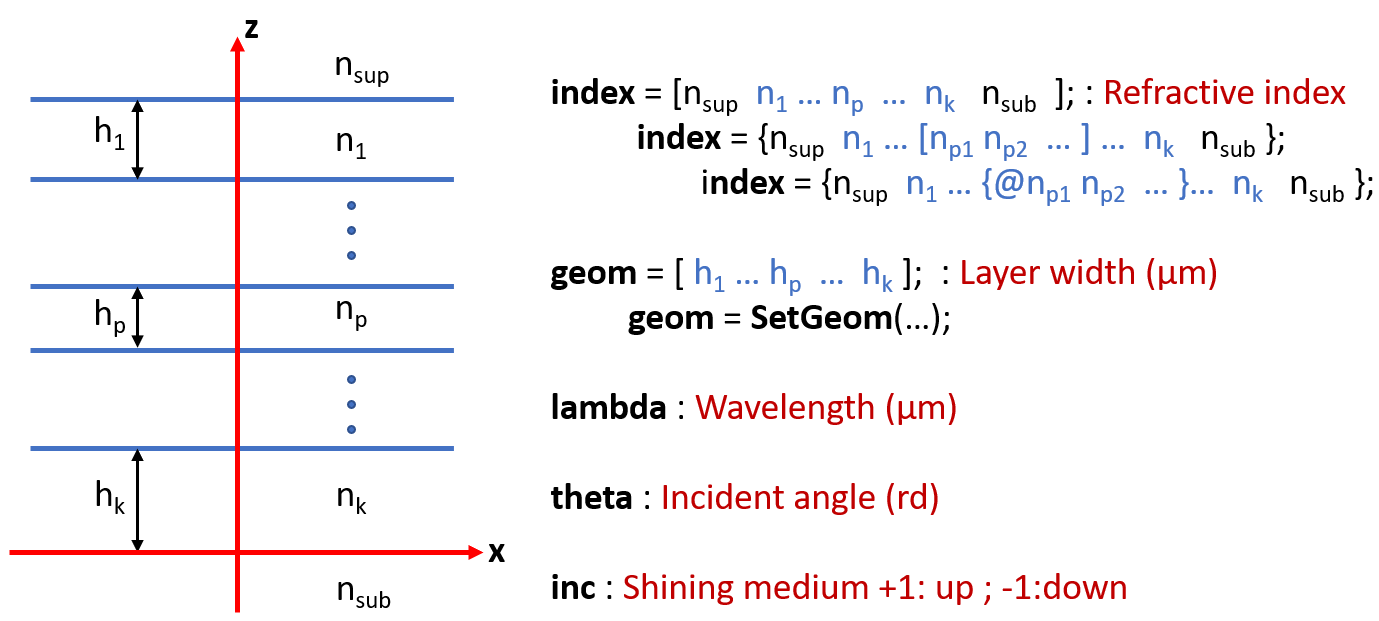


In [2]:

% Syntax
%   [R_tem,T_tem] = Spectrum(index,geom,lambda,theta,inc)
%   [R_tm,T_tm,R_te,T_te] = Spectrum(index,geom,lambda,theta,inc)
%   Model = Spectrum(index,geom,lambda,theta,inc,'param1',val1,...)
%
% Additional parameters: 'param1',val1,...
%       mx  : Number of Fourier terms in x, by default mx=0
%       my  : Number of Fourier terms in y, by default my=0
%       Nper: Possible number of periods (Bragg miror), by default Nper=1
%       Num : Diffracted order numbers,, by default Num=[]
%       Phi0 : Azimuthal angle (rd), by default Phi0=0
%       SymY : Symmetry in y, =0 :TM (PMC), =1 : TE (PEC), by default =2
%              (SymY=0 or 1: Only total R/T will be computed)
%
%   R_tem: Array of total reflectivity TM-TM, TM-TE, TE-TM, TE-TE
%   T_tem: Array of total transmittivity TM-TM, TM-TE, TE-TM, TE-TE
%   R_tm : Array of total reflectivity TM (or diffraction order with 'Num')
%   R_te : Array of total reflectivity TE
%   T_tm : Array of total transmittivity TM
%   T_te : Array of total transmittivity TE
%   Model: = R_tem if length(Theta or/and lambda)>1
%          otherwize a Matlab structure with fields
%          (Mesh,Phys,Data,R_tem,T_tem,Sb,Sh,MatS,CoefD)

# <span style="color:rgb(213,80,0)">**Anti\-reflection coating**</span>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 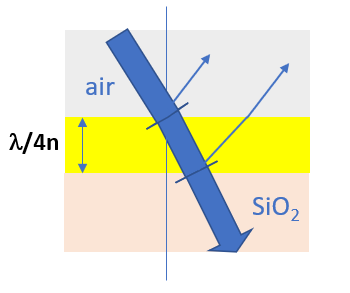



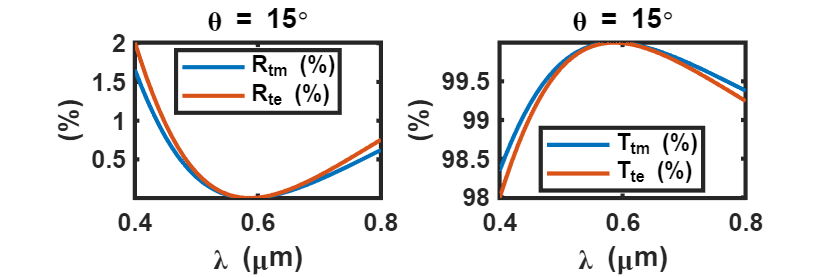

In [3]:
n_air =1;  n_subtrat = 1.5;  n_layer = sqrt(n_air*n_subtrat);
index = [n_air n_layer n_subtrat];
%
wl = .6; % Wavelength reference
geom = wl/(4*n_layer);
%
lambda = .4:.01:.8;  theta = 15*pi/180;  inc = +1;
%
[R_tm,T_tm,R_te,T_te] = Spectrum(index,geom,lambda,theta,inc);
%
figure('Position',[300  300  900  300]),
subplot(121), PlotCoefRTA(lambda,theta,R_tm,R_te), legend('R_{tm} (%)','R_{te} (%)'), axis tight
subplot(122), PlotCoefRTA(lambda,theta,T_tm,T_te), legend('T_{tm} (%)','T_{te} (%)'), axis tight

# <span style="color:rgb(213,80,0)">**Bragg mirror**</span>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 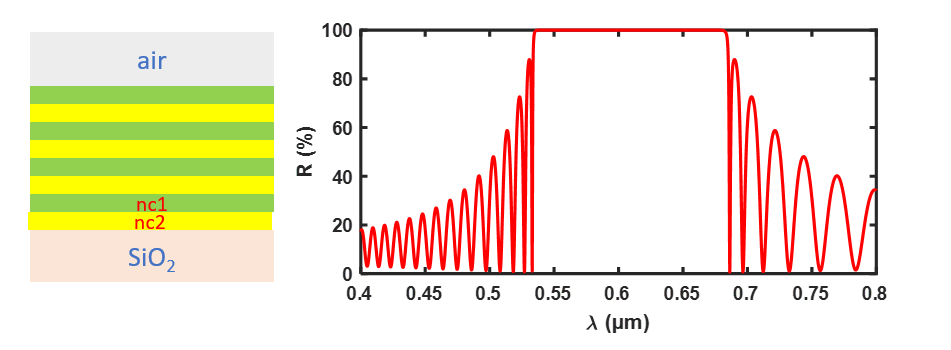



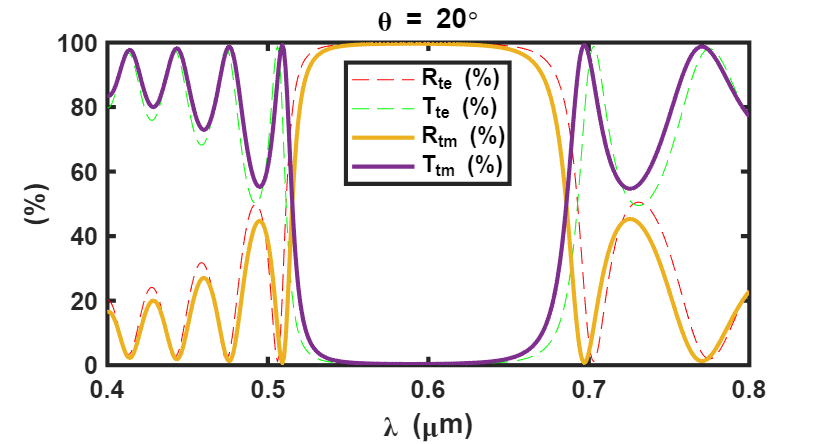

In [4]:

Np = 10; % Number of periods
%
n_air =1; n_subtrat = 1.5; nc1 = 1.5; nc2 = 2.2;
index = [n_air nc1 nc2 n_subtrat];
%
wl0 = .6; % Wave length reference
geom = [wl0/4/nc1;  wl0/4/nc2];
%
lambda = .4:.001:.8; theta = 20*pi/180; inc = +1;
%
[R_tm,T_tm,R_te,T_te] = Spectrum(index,geom,lambda,theta,inc,'Nper',Np);
%
figure('Position',[300  300  560  300]), hold on
plot(lambda,R_te*100,'--r',lambda,T_te*100,'--g'),
PlotCoefRTA(lambda,theta,R_tm,T_tm), legend('R_{te} (%)','T_{te} (%)','R_{tm} (%)','T_{tm} (%)')

# <span style="color:rgb(213,80,0)">**SPR Biosensor**</span>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 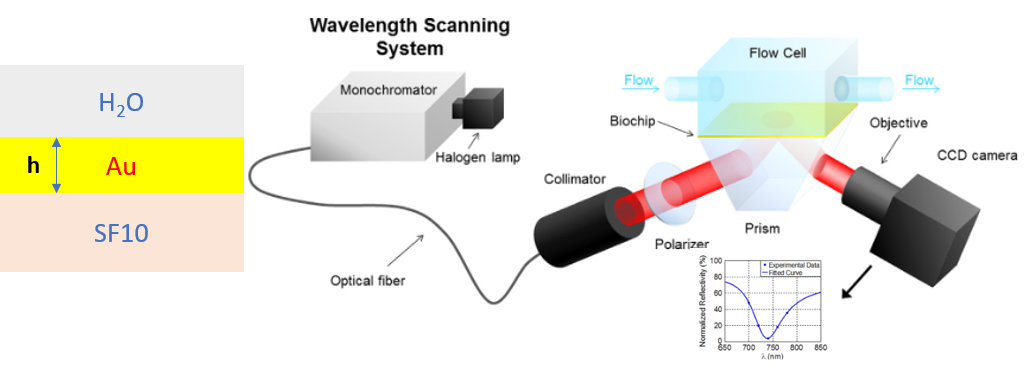


A. Sereda & al [⟨10.1016/j.bios.2013.10.049⟩](https://dx.doi.org/10.1016/j.bios.2013.10.049)



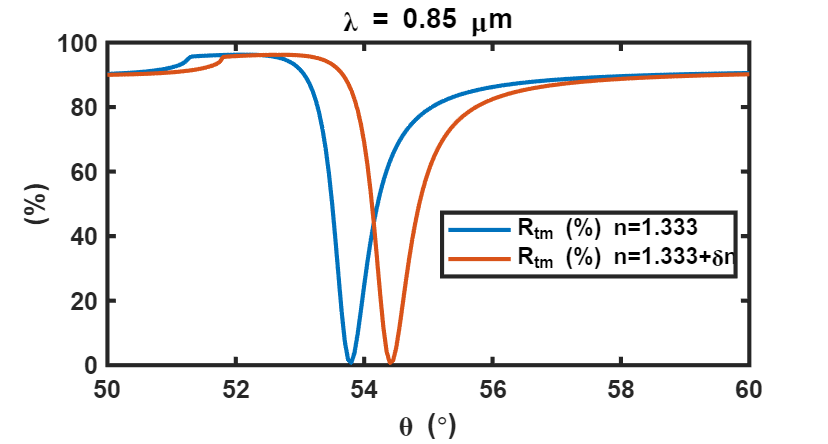

In [5]:
geom = 0.05;
n_H2O = 1.333;
index = {n_H2O , IndexVal('Au') , IndexVal('SF10')};
%
lambda = .85; theta = linspace(50,60,201)*pi/180; inc = -1;
%
%n_H2O = 1.333
[R_tm1,T_tm,R_te,T_te] = Spectrum(index,geom,lambda,theta,inc);
%
% n_H2O = 1.333 + Dn
index = {n_H2O+1e-2 , IndexVal('Au') , IndexVal('SF10')};
[R_tm2,T_tm,R_te,T_te] = Spectrum(index,geom,lambda,theta,inc);
%
figure('Position',[300  300  560  300]),
PlotCoefRTA(lambda,theta,R_tm1,R_tm2), legend('R_{tm} (%) n=1.333','R_{tm} (%) n=1.333+\deltan')

# <span style="color:rgb(213,80,0)">**Resonant Waveguide Grating**</span>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 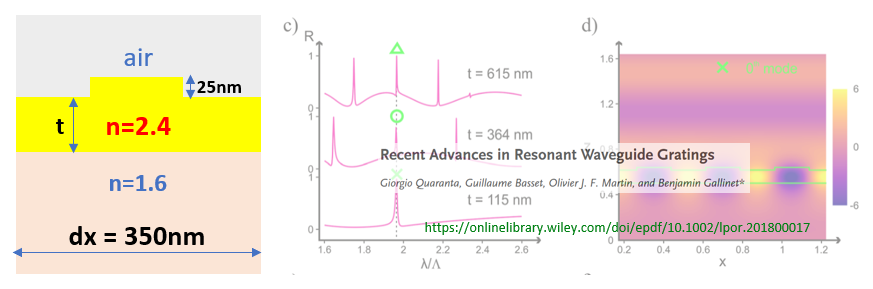



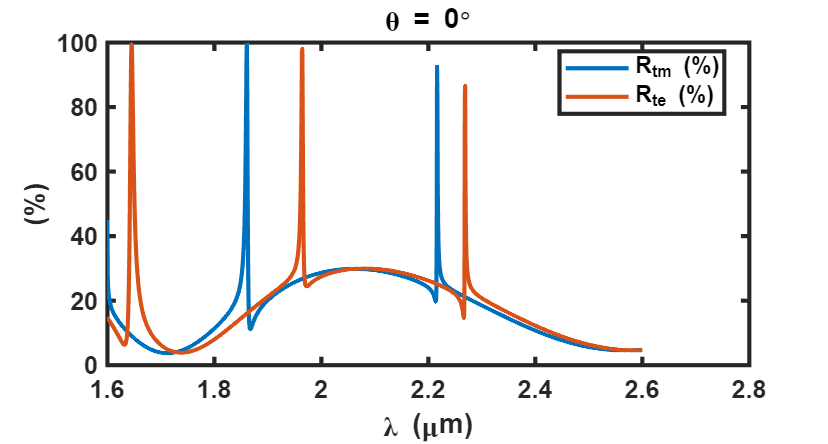

In [6]:
% https://onlinelibrary.wiley.com/doi/epdf/10.1002/lpor.201800017

index = {1 , {2.4 1.}, 2.4 , 1.6};
%
dx = 0.35; lix = dx/2; h = [ .025 0.364];

% With Superformula
geom = SetGeom('dx',dx,'hc',h,'mn',{4; []},'ab',{[lix/2 inf] []});
%
lambda = dx*linspace(1.6,2.6,1601);  theta = 0*pi/180;  inc = +1;
%
[R_tm,T_tm,R_te,T_te] = Spectrum(index,geom,lambda,theta,inc,'mx',15);

figure('Position',[300  300  560  300]),
PlotCoefRTA(lambda/dx,theta,R_tm,R_te), legend('R_{tm} (%)','R_{te} (%)')

# <span style="color:rgb(213,80,0)">**MIM plasmonic nanoantennas**</span>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 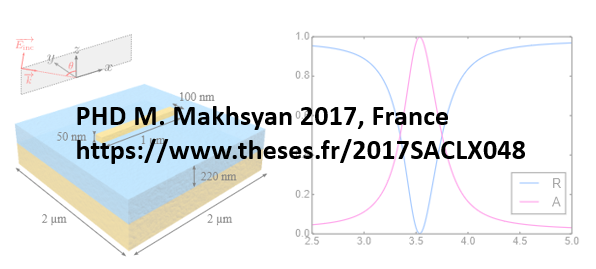



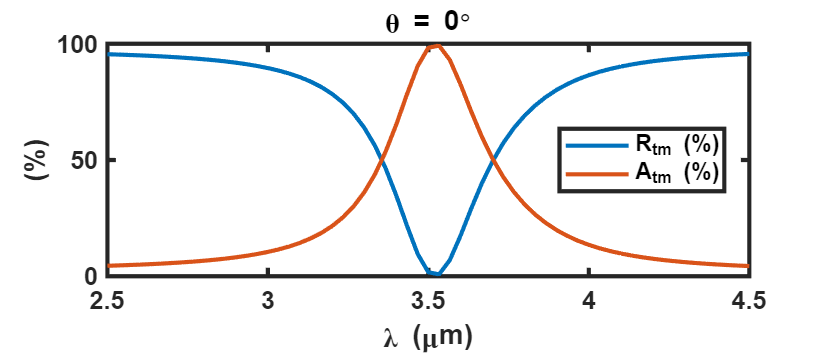

In [7]:
% Drude model for Au
xr = 0.159; g = 0.0077; nAu = @(x) sqrt(1-1./(xr./x.*(xr./x+1i*g)));
index = {1 , {nAu 1} , IndexVal('SiO2'), nAu};
%
dx = 2; dy = 2; L = 1; w = 0.1; h =[.05 0.22];
%
% With Superformula
geom = SetGeom('dx',dx,'dy',dy,'hc',h,'mn',{4 , []},'ab',{[L/2 w/2] , []});
%
lambda = linspace(2.5,4.5,61); theta = 0; inc = +1;
% With symmetry in y
tic, [R_tm,T_tm] = Spectrum(index,geom,lambda,theta,inc,'mx',15,'my',15,'SymY',0); t=toc;
% Without Symmetry
%tic, [R_tm,T_tm,R_te,T_te] = Spectrum(index,geom,lambda,theta,inc,'mx',15,'my',15); t=toc;
%
figure('Position',[300  300  560  240]),
PlotCoefRTA(lambda,theta,R_tm,1-R_tm-T_tm), legend('R_{tm} (%)','A_{tm} (%)')